### 3.1 nltk的一般使用

In [124]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn as sk
import os,time,re,string
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics 

%matplotlib inline

### 4.1. 读取文字描述，查看大概数据情况

In [125]:
review_raw = pd.read_csv('data/data.csv')

In [126]:
review_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
summary    170 non-null object
score      170 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


### 4.2 整理label, 作为正负评价的标签

* 去掉Null值

review = review_raw.dropna()

In [127]:
review = review_raw.dropna()

In [128]:
review.shape

(170, 2)

In [129]:
label = review['score']

### 4.3 整理summary文字栏

* 去标点等符号
* 分词
* stopwords,去掉stopwords
* 词干提取Stemming与词形还原Lemmatization
* 清洗结果对比

In [130]:
summary = review['summary']

In [131]:
summary.head(10)

0                                         Philippines 
1                                                  MIB
2    I was a property acquisition officer at Robins...
3                                     work in New York
4                                                  yes
5                                               Taiwan
6                                                  MBA
7                                construction engineer
8       work in United States as construction engineer
9                                                  yes
Name: summary, dtype: object

#### 4.3.1 数据清洗: 去掉标点符号

* 不要忘记import string
* import string
* string.punctuation

In [132]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [133]:
# Python3 的用法
trantable = str.maketrans("","",string.punctuation)
def data_clean(text):
    text = text.lower()
    #要去掉的元素放到 text.translate的第二个参数中
    text_clean = text.translate(trantable)
    return text_clean

* 对summary执行data_clearn操作
* summary = summary.apply(lambda x: data_clean(x))

In [134]:
summary = summary.apply(lambda x: data_clean(x))

#### 4.3.2 分词 tokenize

In [135]:
from nltk import word_tokenize

In [136]:
# 取一部分做一个展示
demo = summary[:182]

corpus_w_stopword = [word_tokenize(text) for text in demo]

In [137]:
corpus_w_stopword = [word_tokenize(text) for text in demo]

In [138]:
corpus_w_stopword

[['philippines'],
 ['mib'],
 ['i',
  'was',
  'a',
  'property',
  'acquisition',
  'officer',
  'at',
  'robinsons',
  'land',
  'corporation'],
 ['work', 'in', 'new', 'york'],
 ['yes'],
 ['taiwan'],
 ['mba'],
 ['construction', 'engineer'],
 ['work', 'in', 'united', 'states', 'as', 'construction', 'engineer'],
 ['yes'],
 ['china'],
 ['mib'],
 ['working', 'in', 'bank'],
 ['find', 'a', 'job'],
 ['yes'],
 ['america'],
 ['mib'],
 ['i',
  'was',
  'a',
  'teacher',
  'for',
  'kindergarten',
  'through',
  '3rd',
  'grade'],
 ['next',
  'job',
  'in',
  'educational',
  'technology',
  'and',
  'environment',
  'ill',
  'be',
  'working'],
 ['yes'],
 ['south', 'korea'],
 ['mba'],
 ['product', 'analytics', 'manager'],
 ['working', 'in', 'united', 'states'],
 ['yes'],
 ['venezuela'],
 ['mib'],
 ['work'],
 ['work', 'in', 'san', 'francisco'],
 ['yes'],
 ['republic', 'of', 'korea'],
 ['mba'],
 ['work'],
 ['get', 'hired'],
 ['yes'],
 ['china'],
 ['mib'],
 ['working', 'as', 'bank'],
 ['find', 'a'

#### 4.3.3 Stopwords，去掉stopwords

In [139]:
from nltk import FreqDist
from nltk.corpus import stopwords

stopwords.words('english')

定义去除停用词的函数

In [140]:
def remove_stopword(text):
    return [word for word in text if word not in stopwords.words('english')]

去除停用词，创建新的词库

corpus_wo_stopword = [remove_stopword(text) for text in corpus_w_stopword]


In [141]:
corpus_wo_stopword = [remove_stopword(text) for text in corpus_w_stopword]

In [142]:
corpus_wo_stopword

[['philippines'],
 ['mib'],
 ['property', 'acquisition', 'officer', 'robinsons', 'land', 'corporation'],
 ['work', 'new', 'york'],
 ['yes'],
 ['taiwan'],
 ['mba'],
 ['construction', 'engineer'],
 ['work', 'united', 'states', 'construction', 'engineer'],
 ['yes'],
 ['china'],
 ['mib'],
 ['working', 'bank'],
 ['find', 'job'],
 ['yes'],
 ['america'],
 ['mib'],
 ['teacher', 'kindergarten', '3rd', 'grade'],
 ['next', 'job', 'educational', 'technology', 'environment', 'ill', 'working'],
 ['yes'],
 ['south', 'korea'],
 ['mba'],
 ['product', 'analytics', 'manager'],
 ['working', 'united', 'states'],
 ['yes'],
 ['venezuela'],
 ['mib'],
 ['work'],
 ['work', 'san', 'francisco'],
 ['yes'],
 ['republic', 'korea'],
 ['mba'],
 ['work'],
 ['get', 'hired'],
 ['yes'],
 ['china'],
 ['mib'],
 ['working', 'bank'],
 ['find', 'job'],
 ['yes'],
 ['philippines'],
 ['mib'],
 ['worked', 'marketing', 'team'],
 ['work', 'us'],
 ['yes'],
 ['indonesia'],
 ['mib'],
 ['work'],
 ['work'],
 ['yes'],
 ['italy'],
 ['mib']

corpus_wo_stopword[:10]

- See the difference? 
- 去掉了 'not'这类词，这类用词会严重影响情感分析，可行的处理方式？

In [143]:
corpus_wo_h = np.hstack(corpus_wo_stopword)

corpus_wo_h = np.hstack(corpus_wo_stopword)

list.append()

list.extend()

In [144]:
# 计算有多少不重复的词汇:
corpus_wo_h = np.hstack(corpus_wo_stopword)
corpus_w_h = np.hstack(corpus_w_stopword)

print("考虑停止词，不重复词汇有%d"%(len(set(corpus_w_h))))
print("不考虑停止次，不重复的词汇有%d"%(len(set(corpus_wo_h))))

考虑停止词，不重复词汇有117
不考虑停止次，不重复的词汇有95


#### 4.3.4 词干提取与词性还原

In [145]:
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

In [146]:
porter = PorterStemmer()
wnl = WordNetLemmatizer()

print("stemmer: 'eating' ->%d"%(porter.stem('eating')))

print("lemmatization: 'feet' -> %d"%(wnl.lemmatize('feet')))

* stem_wo = [porter.stem(word) for word in corpus_wo_h]
* lem_wo = [wnl.lemmatize(word) for word in corpus_wo_h]

In [147]:
stem_wo = [porter.stem(word) for word in corpus_wo_h]
lem_wo = [wnl.lemmatize(word) for word in corpus_wo_h]

#### 4.3.5 清洗结果对比

* 提取词干，还原词性

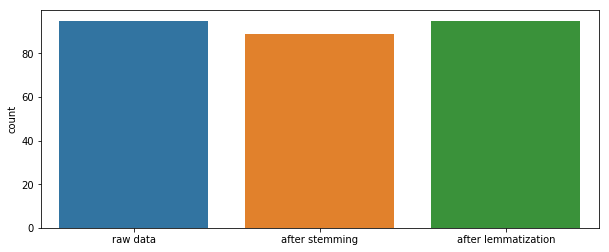

In [148]:
plt.figure(figsize=(10,4))
sns.barplot(x = ['raw data','after stemming', 'after lemmatization'], 
            y = [len(set(corpus_wo_h)), len(set(stem_wo)), len(set(lem_wo))]) 
plt.ylabel('count')
plt.show()

* 去除stopwords后的词频

In [149]:
fdist_wo = pd.DataFrame(list(FreqDist(corpus_wo_h).items()),columns = ['word without','freq without'])
fdist_wo.sort_values(by = 'freq without', inplace = True, ascending = False)

fdist_w = pd.DataFrame(list(FreqDist(corpus_w_h).items()),columns = ['word with','freq with'])
fdist_w.sort_values(by = 'freq with', inplace = True, ascending = False)

In [150]:
fdist_w.head(10)

,word with,freq with
1,mib,27
16,yes,24
13,in,22
12,work,18
4,a,13
94,no,10
28,job,10
25,working,10
2,i,7
24,china,7


* 可视化结果

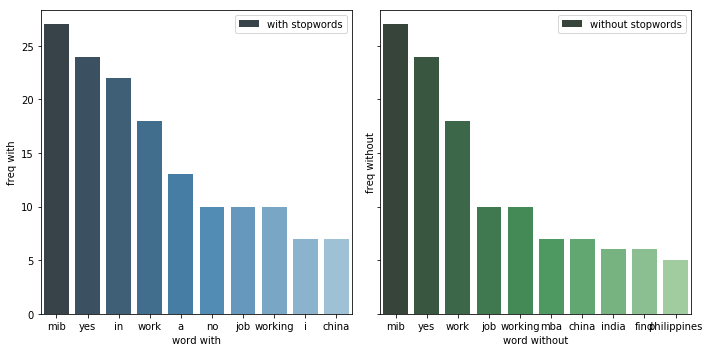

In [151]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True, figsize = (10,5))

sns.barplot(x = fdist_w ['word with'][:10],
           y = fdist_w ['freq with'][:10],
           palette = 'Blues_d',
           ax = ax1,
           label = 'with stopwords')

sns.barplot(x = fdist_wo ['word without'][:10],
           y = fdist_wo ['freq without'][:10],
           palette = 'Greens_d',
           ax = ax2,
           label = 'without stopwords')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.tight_layout()
plt.show()    

#### 附：查看热门短语

In [152]:
from nltk import ngrams

In [153]:
def get_ngrams(text, n = 2):
    return ngrams(text, n)

In [ ]:
s = 'I love data mining'

s_token = word_tokenize(s)
print(s_token)

print(list(get_ngrams(s_token)))

In [154]:
bigram_w = []
for token in corpus_w_stopword:
    bigram = nltk.bigrams(token)
    for item in bigram:
        bigram_w.append(item)
        
bigram_wo = []
for token in corpus_wo_stopword:
    bigram = nltk.bigrams(token)
    for item in bigram:
        bigram_wo.append(item)

len(bigram_w)

len(bigram_wo)

In [34]:
bigram_w

[('you', 'said'),
 ('said', 'philippines'),
 ('i', 'was'),
 ('was', 'a'),
 ('a', 'property'),
 ('property', 'acquisition'),
 ('acquisition', 'officer'),
 ('officer', 'at'),
 ('at', 'robinsons'),
 ('robinsons', 'land'),
 ('land', 'corporation'),
 ('work', 'in'),
 ('in', 'new'),
 ('new', 'york'),
 ('catch', 'that'),
 ('i', 'want'),
 ('construction', 'engineer'),
 ('working', 'in'),
 ('in', 'united'),
 ('united', 'states'),
 ('states', 'accept'),
 ('accept', 'construction'),
 ('construction', 'engineer'),
 ('designer', 'and'),
 ('and', 'merchandising'),
 ('go', 'back'),
 ('back', 'to'),
 ('to', 'the'),
 ('the', 'philippines'),
 ('philippines', 'and'),
 ('and', 'work'),
 ('catch', 'that'),
 ('working', 'in'),
 ('in', 'bank'),
 ('find', 'a'),
 ('a', 'job'),
 ('work', 'in'),
 ('in', 'consulting'),
 ('buy', 'boats'),
 ('find', 'a'),
 ('a', 'job'),
 ('i', 'was'),
 ('was', 'a'),
 ('a', 'teacher'),
 ('teacher', 'for'),
 ('for', 'kindergarten'),
 ('kindergarten', 'through'),
 ('through', '3rd'),


In [43]:
len(bigram_wo)

86

In [155]:
bifq = FreqDist(bigram_wo)
bifq.most_common(20)

[(('find', 'job'), 6),
 (('united', 'states'), 4),
 (('start', 'working'), 3),
 (('construction', 'engineer'), 2),
 (('working', 'bank'), 2),
 (('work', 'us'), 2),
 (('get', 'job'), 2),
 (('job', 'united'), 2),
 (('job', 'us'), 2),
 (('go', 'back'), 2),
 (('property', 'acquisition'), 1),
 (('acquisition', 'officer'), 1),
 (('officer', 'robinsons'), 1),
 (('robinsons', 'land'), 1),
 (('land', 'corporation'), 1),
 (('work', 'new'), 1),
 (('new', 'york'), 1),
 (('work', 'united'), 1),
 (('states', 'construction'), 1),
 (('teacher', 'kindergarten'), 1)]

* 将语料库中的bigram词频转化成dataframe格式


In [156]:

bi_fd_w = pd.DataFrame(list(FreqDist(bigram_w).items()), columns=['bi_w', 'bicounts_w'])
bi_fd_wo = pd.DataFrame(list(FreqDist(bigram_wo).items()), columns=['bi_wo', 'bicounts_wo'])

* 排个序
* bi_fd_w.sort_values(by = 'bicounts_w', inplace = True, ascending = False)
* bi_fd_wo.sort_values(by = 'bicounts_wo', inplace = True, ascending = False)


In [157]:
bi_fd_w.sort_values(by = 'bicounts_w', inplace = True, ascending = False)
bi_fd_wo.sort_values(by = 'bicounts_wo', inplace = True, ascending = False)

In [158]:
bi_fd_w.head()

,bi_w,bicounts_w
9,"(work, in)",8
20,"(a, job)",8
50,"(in, the)",5
28,"(job, in)",5
19,"(find, a)",5


In [159]:
bi_fd_wo.head()

,bi_wo,bicounts_wo
12,"(find, job)",6
9,"(united, states)",4
34,"(start, working)",3
40,"(get, job)",2
47,"(job, united)",2


* 可视化

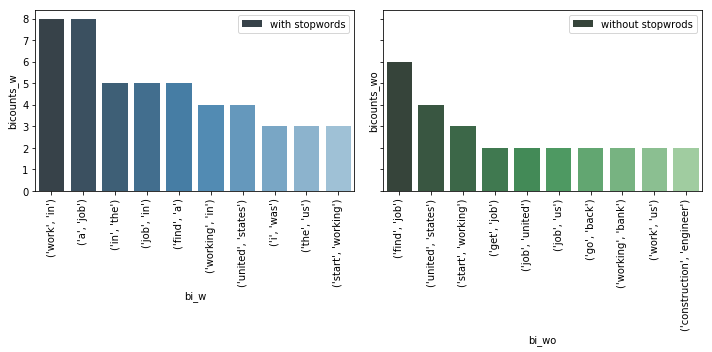

In [160]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey = True,figsize = (10,5))

sns.barplot(x = bi_fd_w['bi_w'][:10],
            y =bi_fd_w['bicounts_w'][:10], 
            palette='Blues_d',
            ax = ax1, 
            label = 'with stopwords') 

sns.barplot(x = bi_fd_wo['bi_wo'][:10],
            y =bi_fd_wo['bicounts_wo'][:10], 
            palette='Greens_d', 
            ax = ax2, 
            label = 'without stopwrods') 

ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=90)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=90)


ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

### 4.4 建模
* 数据预处理
* tfidf处理，转化成频率
* 调用具体模型

#### 4.4.1 Data Preprocessing数据预处理

In [161]:
def stem_tokens(tokens, stemmer = PorterStemmer()):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens)
    return ' '.join(stems)

def build_corpus(dataset):
    corpus = []
    for text in dataset:
        # without the decoding, there will be UnicodeDecodeError when tokenizing
        corpus.append(tokenize(text))  
    return corpus

In [162]:
# 在第二步时已经去除了标点
n=170
X = summary[:n]
y = label[:n]



* 分成训练集合测试集
* seed = 2018
* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [163]:
seed = 2018
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=seed)

* 建语料库

In [164]:
train_token = build_corpus(X_train)
test_token = build_corpus(X_test)

In [165]:
train_token[:10]

['mib',
 'ye',
 'find a job in the unit state',
 'republ of korea',
 'find job',
 'ye',
 'ye',
 'ye',
 'work',
 'work in the us']

#### 4.4.2 进一步处理，计算单词出现的tf-idf频率：sklearn TfidfVectorizer (会用就行)


* 什么是TF-IDF？
* TF: term frequency 具体单词在某篇文章中的出现次数 
* $TF_{词i,文章j} = \frac{词i在文章j中的频率}{文章j中所有词的频率总和}$
* IDF: inversed document frequency 
* $IDF_{词i} = log \frac{所有文章的篇数总和}{带有词汇i的文章篇数总和}$


In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()

X_train_tfidf_vec = tfidf_vec.fit_transform(train_token)
X_test_tfidf_vec = tfidf_vec.transform(test_token)

查看结果

for item in X_test_tfidf_vec:

    print(item)
    
    print("---")

In [167]:
for item in X_test_tfidf_vec:
    print(item)

    print("---")

  (0, 20)	1.0
---
  (0, 35)	1.0
---
  (0, 60)	1.0
---
  (0, 33)	1.0
---

---

---
  (0, 25)	0.7789941275802071
  (0, 24)	0.6270312186769905
---
  (0, 35)	1.0
---
  (0, 59)	1.0
---
  (0, 35)	1.0
---
  (0, 60)	0.4511057342695466
  (0, 24)	0.506802013003974
  (0, 3)	0.7346123713389621
---
  (0, 61)	1.0
---
  (0, 60)	1.0
---
  (0, 55)	1.0
---
  (0, 9)	1.0
---
  (0, 15)	1.0
---
  (0, 61)	1.0
---
  (0, 35)	1.0
---
  (0, 60)	1.0
---
  (0, 53)	0.7006376549117959
  (0, 36)	0.35031882745589793
  (0, 29)	0.2598336525204522
  (0, 20)	0.35031882745589793
  (0, 16)	0.27096772303607414
  (0, 5)	0.35031882745589793
---
  (0, 35)	1.0
---

---
  (0, 60)	1.0
---
  (0, 61)	1.0
---
  (0, 60)	0.47196947837031306
  (0, 57)	0.7043355215125363
  (0, 24)	0.5302417228232026
---
  (0, 30)	1.0
---
  (0, 60)	0.6648700822051761
  (0, 24)	0.7469590174758467
---
  (0, 33)	1.0
---
  (0, 60)	0.38586489385241735
  (0, 46)	0.5758388279330241
  (0, 24)	0.4335061385744207
  (0, 10)	0.5758388279330241
---
  (0, 60)	1.0
---
 

X_train_tfidf_vec的大小 X_train_tfidf_vec.shape


In [118]:
X_train_tfidf_vec.shape

(100, 88)

有哪些词语？tfidf_vec.get_feature_names()

In [119]:
tfidf_vec.get_feature_names()

['after',
 'am',
 'america',
 'an',
 'analyt',
 'and',
 'at',
 'back',
 'bank',
 'be',
 'belgium',
 'boat',
 'book',
 'brazil',
 'busi',
 'buy',
 'catch',
 'china',
 'consult',
 'countri',
 'data',
 'deloitt',
 'do',
 'educ',
 'employ',
 'engin',
 'environ',
 'find',
 'firm',
 'for',
 'franc',
 'francisco',
 'germani',
 'get',
 'go',
 'graduat',
 'hire',
 'ill',
 'in',
 'india',
 'internship',
 'itali',
 'job',
 'know',
 'korea',
 'manag',
 'market',
 'markyi',
 'mba',
 'mib',
 'miv',
 'mta',
 'my',
 'netherland',
 'next',
 'nigeria',
 'no',
 'not',
 'of',
 'on',
 'philippin',
 'plan',
 'product',
 'republ',
 'said',
 'san',
 'start',
 'state',
 'student',
 'studi',
 'sure',
 'team',
 'tech',
 'technolog',
 'that',
 'the',
 'to',
 'undergrad',
 'unit',
 'us',
 'vacat',
 'wa',
 'walk',
 'want',
 'will',
 'work',
 'ye',
 'you']

#### 4.4.3 调用具体模型 train & predict

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#### 逻辑回归

In [169]:
lr = LogisticRegression().fit(X_train_tfidf_vec,y_train)
ypred_lr = lr.predict(X_train_tfidf_vec)

#### 与RandomForestClassifier对比

In [170]:
models = {}
models['lgr'] = LogisticRegression()
models['RF'] = RandomForestClassifier(n_estimators = 50, max_depth =1,min_samples_split = 3)

* 将结果保存在pd.DataFrame中

In [171]:
results = pd.DataFrame(index = models.keys(), columns = ['f1_score', 'precision_score', 'recall_score','auc'])

for (clf_name,clf) in models.items():
    clf.fit(X_train_tfidf_vec, y_train)
    ypred = clf.predict(X_test_tfidf_vec)
    f1score = metrics.f1_score(y_test,ypred)
    precision = metrics.precision_score(y_test,ypred)
    recall = metrics.recall_score(y_test,ypred)
    auc = metrics.roc_auc_score(y_test,ypred)
    results.loc[clf_name,:] = [f1score,precision,recall,auc]

In [172]:
results

,f1_score,precision_score,recall_score,auc
lgr,0.846154,0.753425,0.964912,0.532456
RF,0.850746,0.74026,1,0.5
